# Scaling Numeric Data 

## Exercises

### Do your work for these exercises in a jupyter notebook named scaling. Use the telco(zillow) dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle

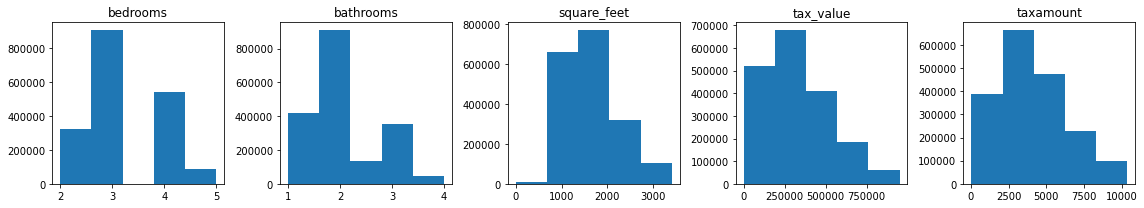

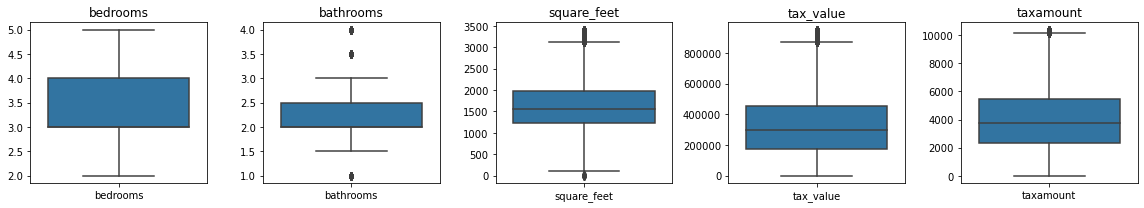

In [8]:
train, validate, test = wrangle.wrangle_zillow()

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1038959.0,3.214004,0.781049,2.0,3.0,3.0,4.0,5.0
bathrooms,1038959.0,2.053663,0.707839,1.0,2.0,2.0,2.5,4.0
square_feet,1038959.0,1653.719097,564.247247,1.0,1232.0,1548.0,1987.0,3410.0
tax_value,1038959.0,327962.928757,198987.574520,22.0,173843.5,296624.0,452514.0,950940.0
year_built,1038959.0,1959.441559,20.533659,1812.0,1949.0,1957.0,1972.0,2016.0


In [10]:
#check the shape
train.shape, validate.shape, test.shape

((1038959, 6), (445269, 6), (371057, 6))

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [12]:
# Define the thing
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the thing
scaler.fit(train[['square_feet']])

#transform
scaled = scaler.transform(train[['square_feet']])


# single step to fit and transform
scaled = scaler.fit_transform(train[['square_feet']])
scaled

array([[0.4576122 ],
       [0.5189205 ],
       [0.42563802],
       ...,
       [0.62511   ],
       [0.22851276],
       [0.33176885]])

In [13]:
#you can make a new 'scaled' column in original dataframe if you wish
train['square_feet_scaled']  = scaled

In [15]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,fips,square_feet_scaled
10057,4.0,2.0,1561.0,248240.0,1973.0,6059.0,0.457612
2004969,3.0,2.0,1770.0,88390.0,1960.0,6037.0,0.518921
306031,2.0,1.0,1452.0,81169.0,1946.0,6037.0,0.425638
1038594,3.0,1.0,1000.0,119174.0,1950.0,6037.0,0.293048
270959,3.0,2.0,1974.0,432268.0,1988.0,6037.0,0.578762


Text(0, 0.5, 'Scaled Square Feet')

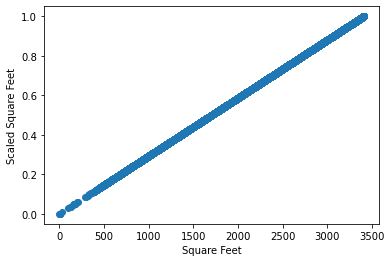

In [16]:
# plot square feet vs scaled square feet

plt.scatter(train.square_feet, scaled)
plt.xlabel('Square Feet')
plt.ylabel('Scaled Square Feet')

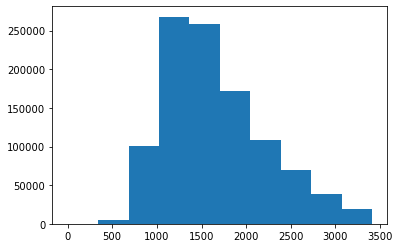

In [17]:
# plot distribution of square feet
plt.hist(train.square_feet);

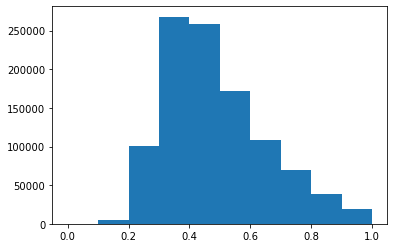

In [18]:
# plot distribution of scaled square feet
plt.hist(scaled);

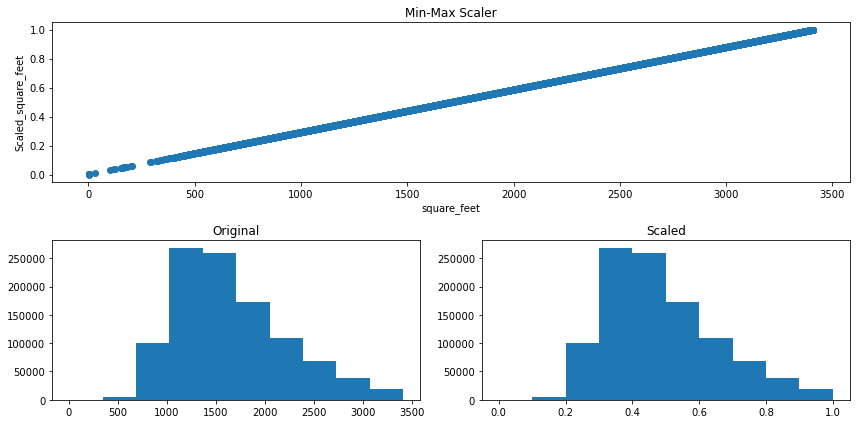

In [19]:
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.square_feet, scaled)
ax1.set(xlabel = 'square_feet', ylabel = 'Scaled_square_feet', title = 'Min-Max Scaler')

ax2.hist(train.square_feet)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();

In [20]:
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

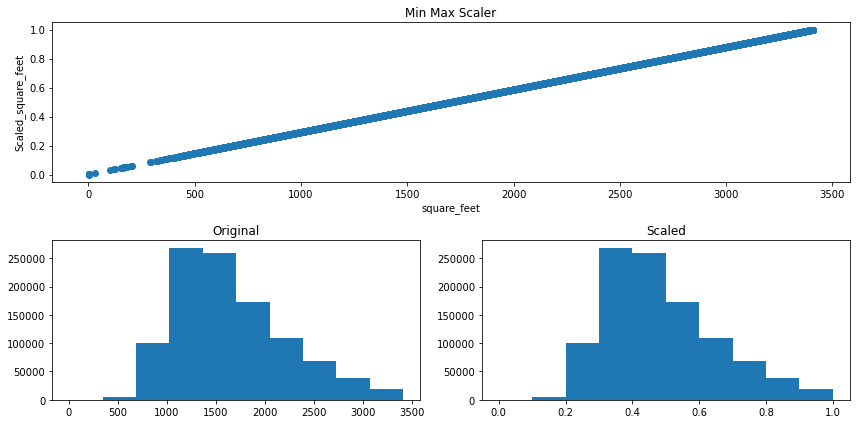

In [21]:
# use the function created above for square feet

visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'square_feet')

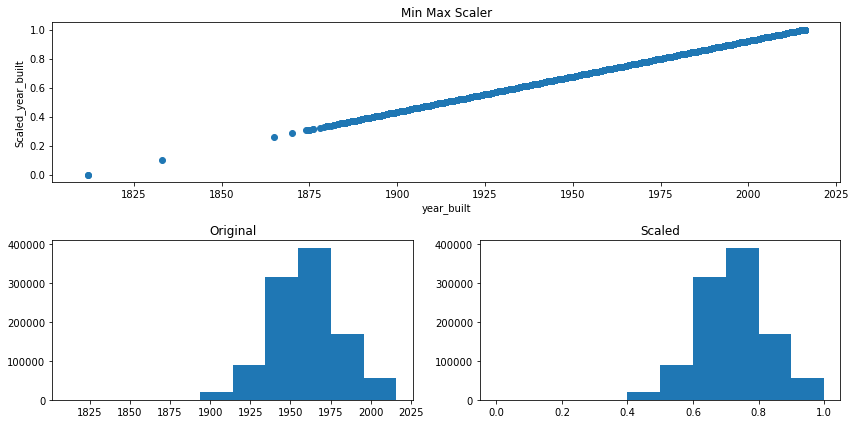

In [22]:
# visualize scaling for year built

visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'year_built')

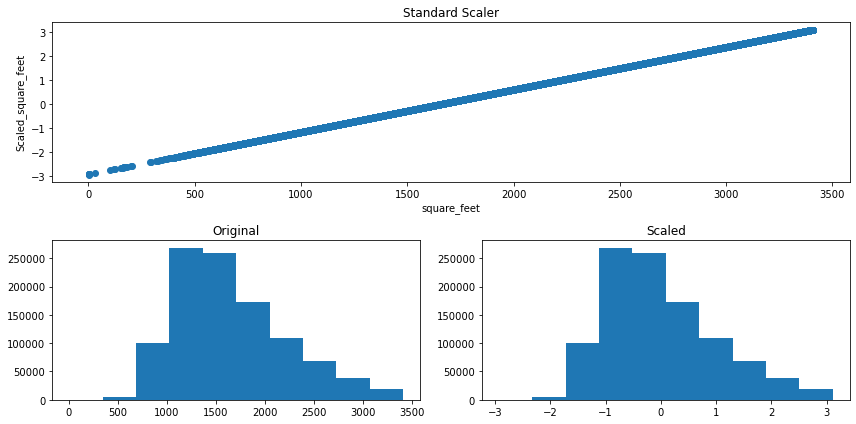

In [23]:
# visualize scaling for square feet

visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'square_feet')

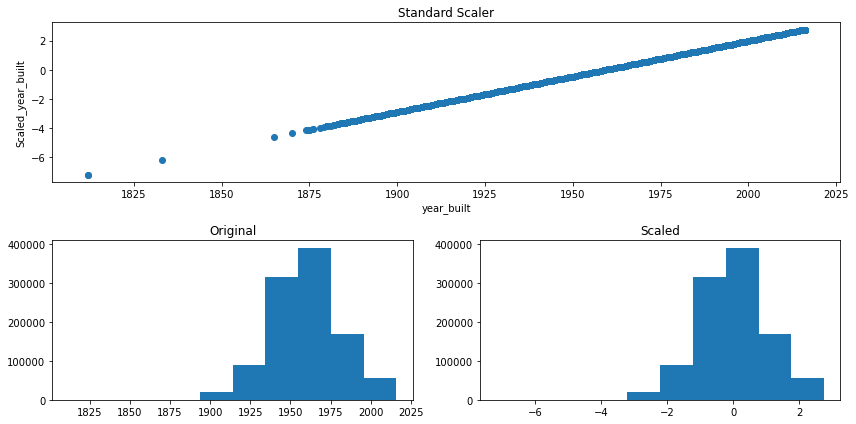

In [24]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'year_built')

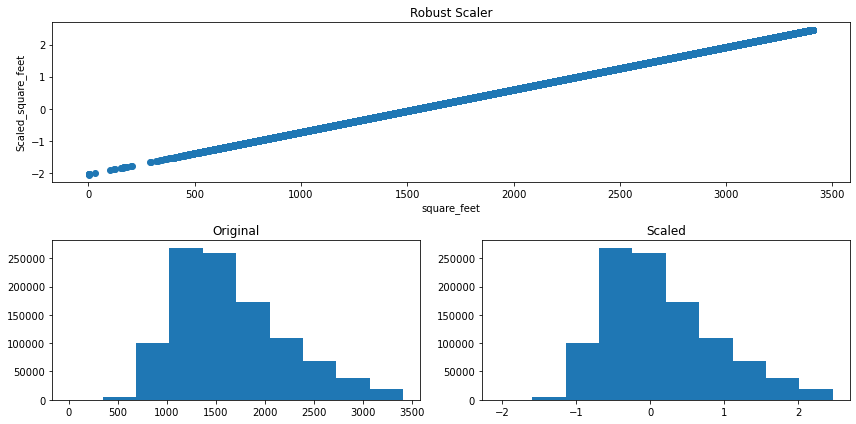

In [26]:
# RobustScaler
visualize_scaled_date(sklearn.preprocessing.RobustScaler(), 'Robust Scaler', 'square_feet')

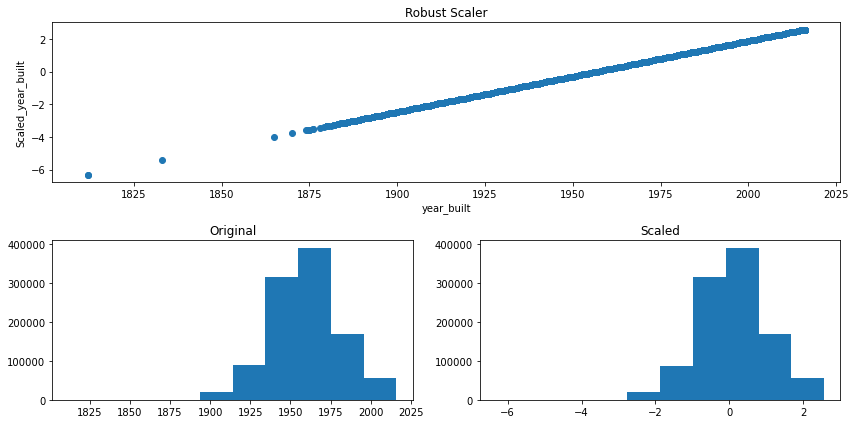

In [27]:
visualize_scaled_date(sklearn.preprocessing.RobustScaler(), 'Robust Scaler', 'year_built')

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data? 

In [ ]:
original_square_feet=scaler.inverse_transform(train['calculatedfinishedsquarefeet_scaled'])

In [28]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,fips,square_feet_scaled
10057,4.0,2.0,1561.0,248240.0,1973.0,6059.0,0.457612
2004969,3.0,2.0,1770.0,88390.0,1960.0,6037.0,0.518921
306031,2.0,1.0,1452.0,81169.0,1946.0,6037.0,0.425638
1038594,3.0,1.0,1000.0,119174.0,1950.0,6037.0,0.293048
270959,3.0,2.0,1974.0,432268.0,1988.0,6037.0,0.578762


In [29]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['square_feet', 'year_built']])
scaled

array([[0.4576122 , 0.78921569],
       [0.5189205 , 0.7254902 ],
       [0.42563802, 0.65686275],
       ...,
       [0.62511   , 0.82352941],
       [0.22851276, 0.70098039],
       [0.33176885, 0.50980392]])

In [30]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['square_feet', 'year_built'])
scaled_df.head()

,square_feet,year_built
10057,0.457612,0.789216
2004969,0.518921,0.725490
306031,0.425638,0.656863
1038594,0.293048,0.676471
270959,0.578762,0.862745


In [31]:
# use inverse_transform method

scaler.inverse_transform(scaled_df)

array([[1561., 1973.],
       [1770., 1960.],
       [1452., 1946.],
       ...,
       [2132., 1980.],
       [ 780., 1955.],
       [1132., 1916.]])

In [32]:
# we can change numpy 2d array to a dataframe

unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['square_feet', 'year_built'])
unscaled_df.head()

,square_feet,year_built
10057,1561.0,1973.0
2004969,1770.0,1960.0
306031,1452.0,1946.0
1038594,1000.0,1950.0
270959,1974.0,1988.0


## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

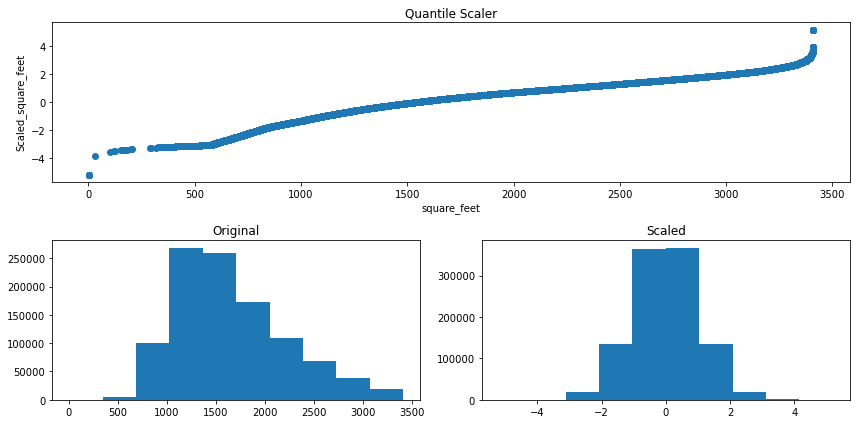

In [33]:
#visualize square feet quantile transformation with 'normal' output

visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'square_feet')

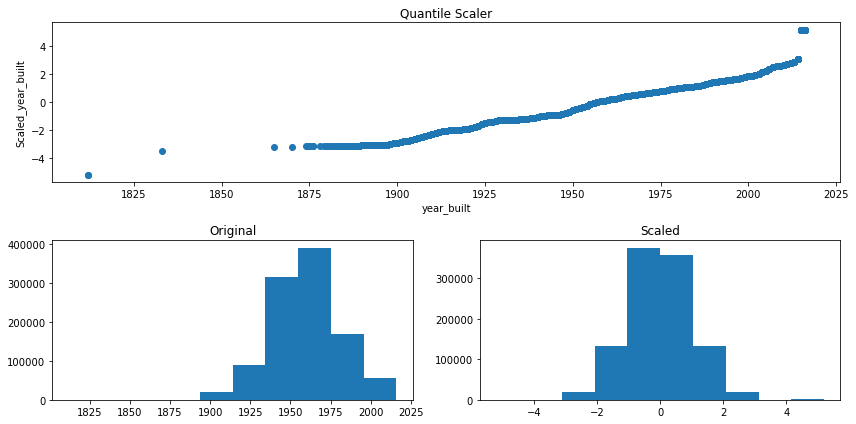

In [35]:
# for year built

visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'year_built')


## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

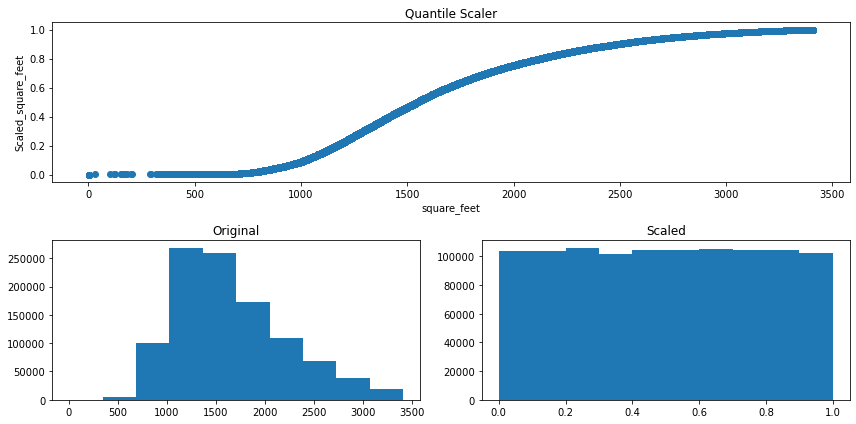

In [34]:
#visualize square feet quantile transformation with 'uniform' output

visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'square_feet')

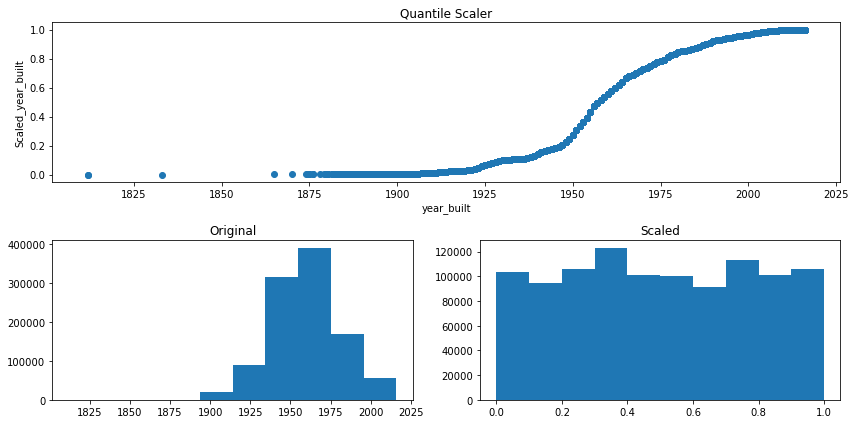

In [36]:
#visualize year built quantile transformation with 'uniform' output
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'year_built')

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [37]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [38]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [39]:
X_train = train[['square_feet', 'year_built']]
X_validate = test[['square_feet', 'year_built']]
X_test = test[['square_feet', 'year_built']]

In [40]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,square_feet,year_built
10057,-0.164324,0.660304
2004969,0.206082,0.027196
306031,-0.357501,-0.654611
1038594,-1.158569,-0.459809
270959,0.567625,1.390812


### Scaling Takeaways:

- Handle outliers first (unless you know that you want to use a non-linear (e.g. Quantile Transformer)) scaling
- Min-Max Scaler will transform each value in the column proportionally within the desireable range (usually [0,1]). - Use this as the your first choice to scale. It will preserve the shape of the distribution (no distortion).
- Standard Scaler will transform each value in the column to range about the mean 0 and standard deviation 1, Use - - StandardScaler if you know the data distribution is normal.
- If there are outliers (which you don't want to discard), use RobustScaler. Alternatively you could remove the outliers and use either of the above 2 scalers
- Good practice to visualize the distribution of variables after scaling (make sure the transformation you were hoping for actually happened)
- Use non-linear scalers when you really have to (e.g.Quantiler Transformer when you must have data normally distributed).
